# Business case :The business case is about to predict the count of casual and registered users of bike rental company. It is a supervised machine learning problem where the target variable is 'cnt'.
 
## Business problem: Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors.


In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data
data = pd.read_csv('hour.csv')
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


# Step 1 - Basic checks

In [5]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
data.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [7]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


# Step 2 - Exploratory data analysis

In [18]:
# Step 1 - Univariate analysis
import sweetviz as sv
my_repo = sv.analyze(data)
my_repo.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Insights from univariate analysis

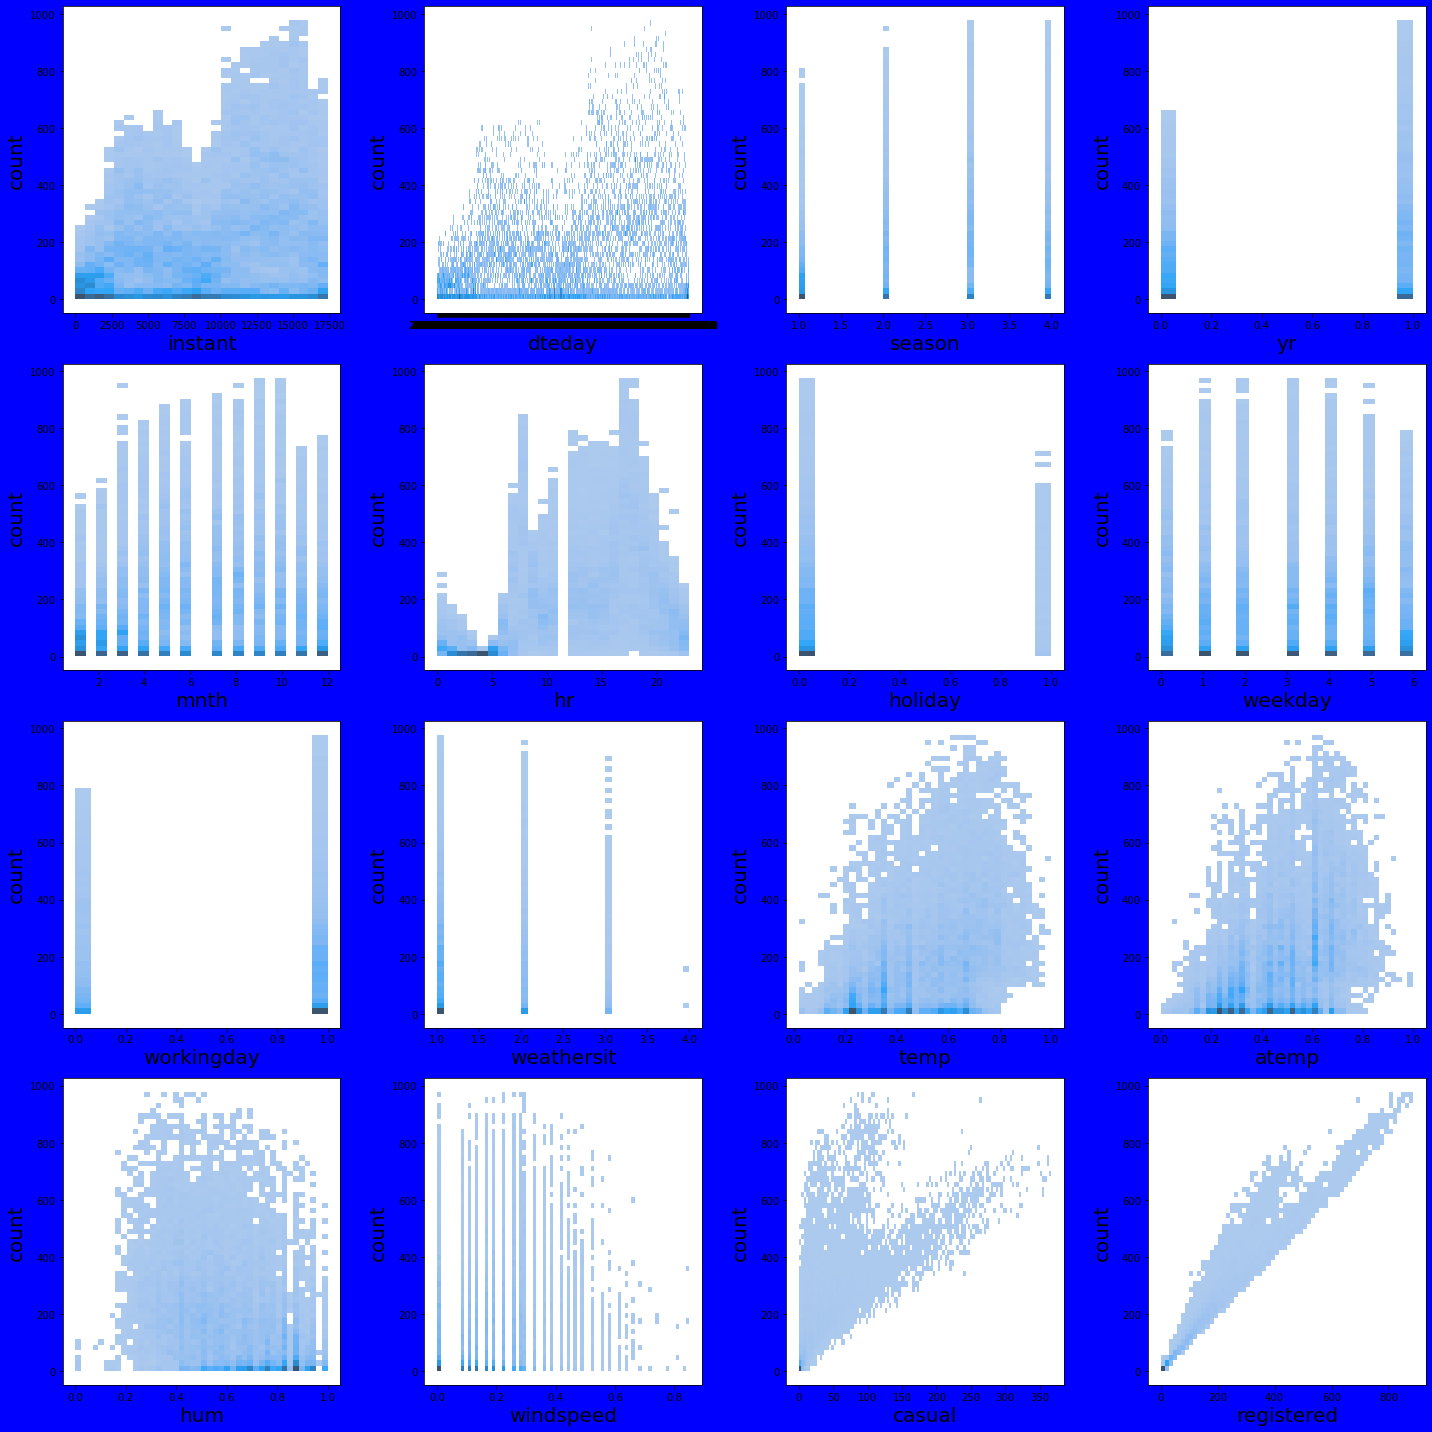

In [57]:
# Step 3 - Bivariate analysis
plt.figure(figsize=(20,20),facecolor='blue',)
plotnumber = 1
for column in data:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=column,y='cnt',data=data)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

<Figure size 720x360 with 0 Axes>

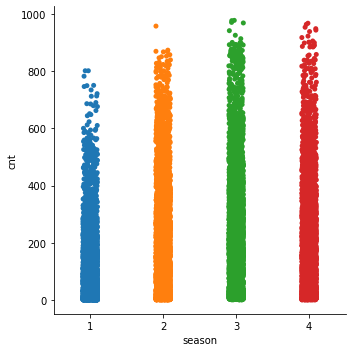

In [37]:
plt.figure(figsize=(10,5),facecolor='green',)
sns.catplot(x='season',y='cnt',data=data)
plt.show()

<Figure size 720x360 with 0 Axes>

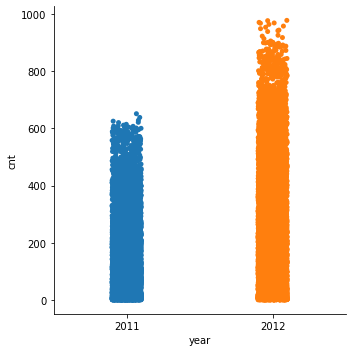

In [97]:
plt.figure(figsize=(10,5),facecolor='green',)
sns.catplot(x='year',y='cnt',data=data)
plt.show()

<Figure size 720x720 with 0 Axes>

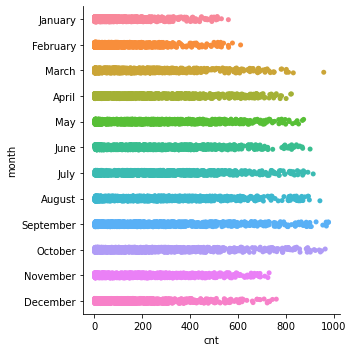

In [18]:
plt.figure(figsize=(10,10),facecolor='green',)
sns.catplot(y='month',x='cnt',data=data)
plt.show()

<Figure size 720x360 with 0 Axes>

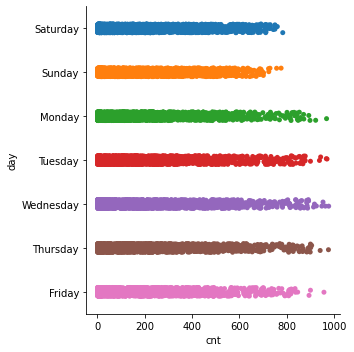

In [14]:
plt.figure(figsize=(10,5),facecolor='green',)
sns.catplot(y='day',x='cnt',data=data)
plt.show()

<Figure size 1440x1440 with 0 Axes>

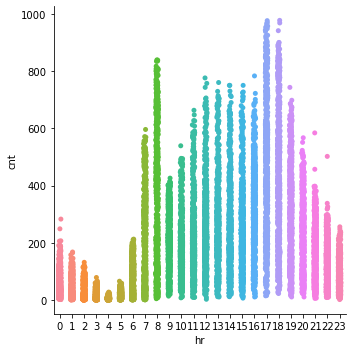

In [52]:
plt.figure(figsize=(20,20),facecolor='green',)
sns.catplot(x='hr',y='cnt',data=data)
plt.show()

<Figure size 1440x1440 with 0 Axes>

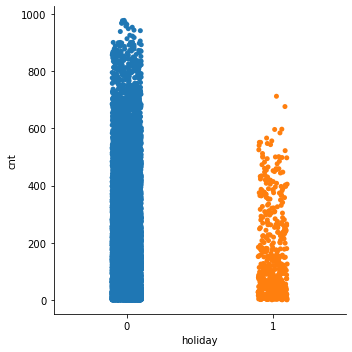

In [58]:
plt.figure(figsize=(20,20),facecolor='green',)
sns.catplot(x='holiday',y='cnt',data=data)
plt.show()

<Figure size 1440x1440 with 0 Axes>

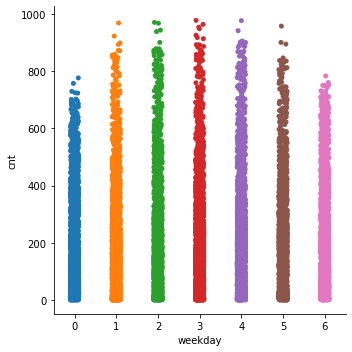

In [59]:
plt.figure(figsize=(20,20),facecolor='green',)
sns.catplot(x='weekday',y='cnt',data=data)
plt.show()

<Figure size 1440x1440 with 0 Axes>

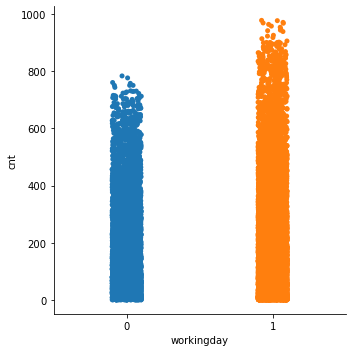

In [60]:
 plt.figure(figsize=(20,20),facecolor='green',)
sns.catplot(x='workingday',y='cnt',data=data)
plt.show()

<Figure size 1440x1440 with 0 Axes>

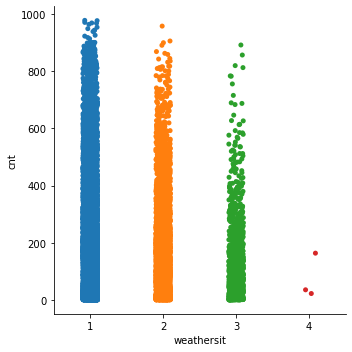

In [61]:
plt.figure(figsize=(20,20),facecolor='green',)
sns.catplot(x='weathersit',y='cnt',data=data)
plt.show()

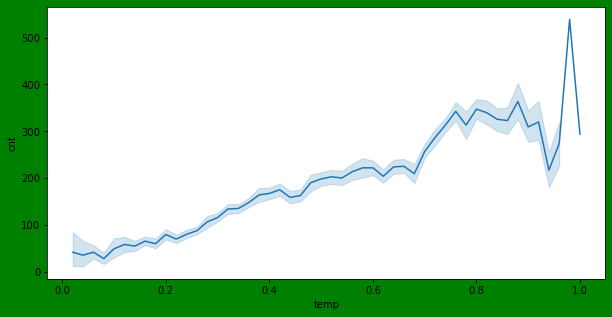

In [66]:
plt.figure(figsize=(10,5),facecolor='green',)
sns.lineplot(x='temp',y='cnt',data=data)
plt.show()

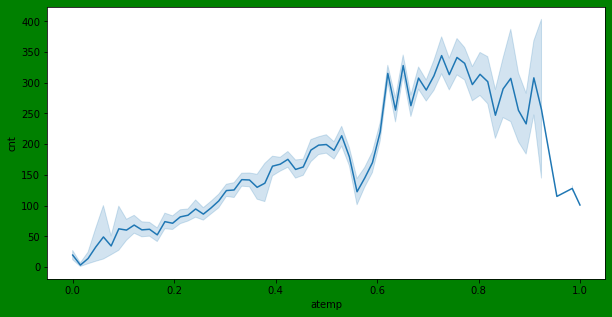

In [68]:
plt.figure(figsize=(10,5),facecolor='green',)
sns.lineplot(x='atemp',y='cnt',data=data)
plt.show()

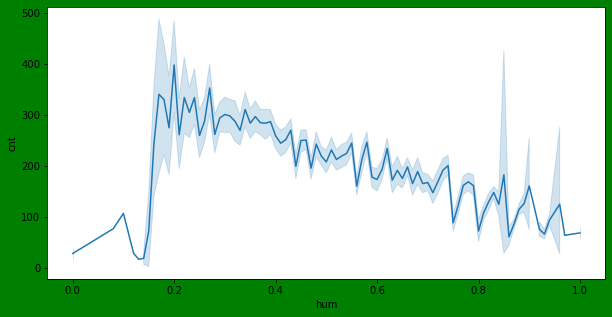

In [69]:
plt.figure(figsize=(10,5),facecolor='green',)
sns.lineplot(x='hum',y='cnt',data=data)
plt.show()

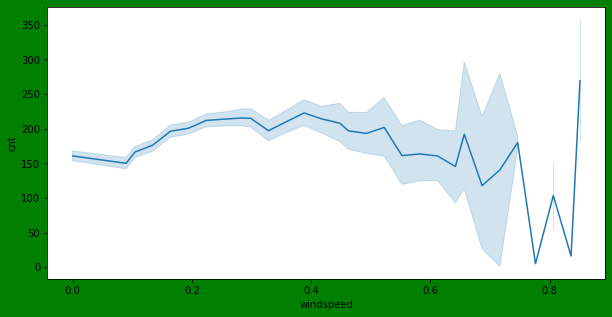

In [70]:
plt.figure(figsize=(10,5),facecolor='green',)
sns.lineplot(x='windspeed',y='cnt',data=data)
plt.show()

<Figure size 720x360 with 0 Axes>

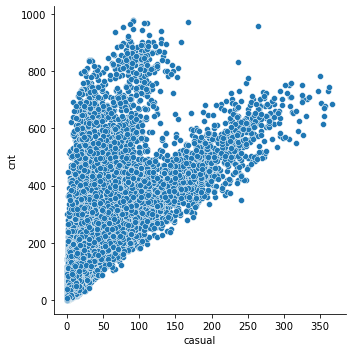

In [78]:
plt.figure(figsize=(10,5),facecolor='green',)
sns.relplot(x='casual',y='cnt',data=data)
plt.show()

<Figure size 720x360 with 0 Axes>

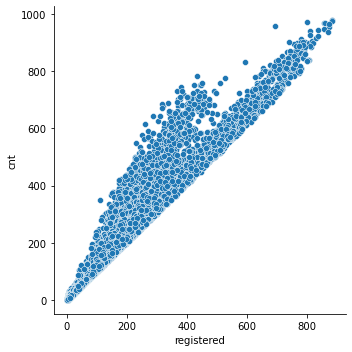

In [79]:
plt.figure(figsize=(10,5),facecolor='green',)
sns.relplot(x='registered',y='cnt',data=data)
plt.show()

In [23]:
data['dteday'] = pd.to_datetime(data['dteday'])

In [25]:
data['day'] = pd.DatetimeIndex(data['dteday']).day

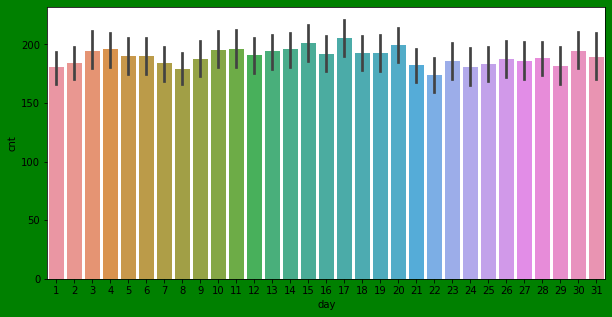

In [42]:
plt.figure(figsize=(10,5),facecolor='green')
sns.barplot(x='day',y='cnt',data=data,)
plt.show()
# Every day more or less have same demand with minute differences in their mean

## Insights from bivariate analysis

## Step 3 - Data preprocessing and feature engineering

In [45]:
#Step 1 Checking the missing values
data.isnull().sum()
# There are no missing values in the dataset

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [48]:
#Step 2 Representation of string data
'''No encoding features are there to encode'''

'No encoding features are there to encode'

In [49]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [56]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [59]:
df = data[['temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']]

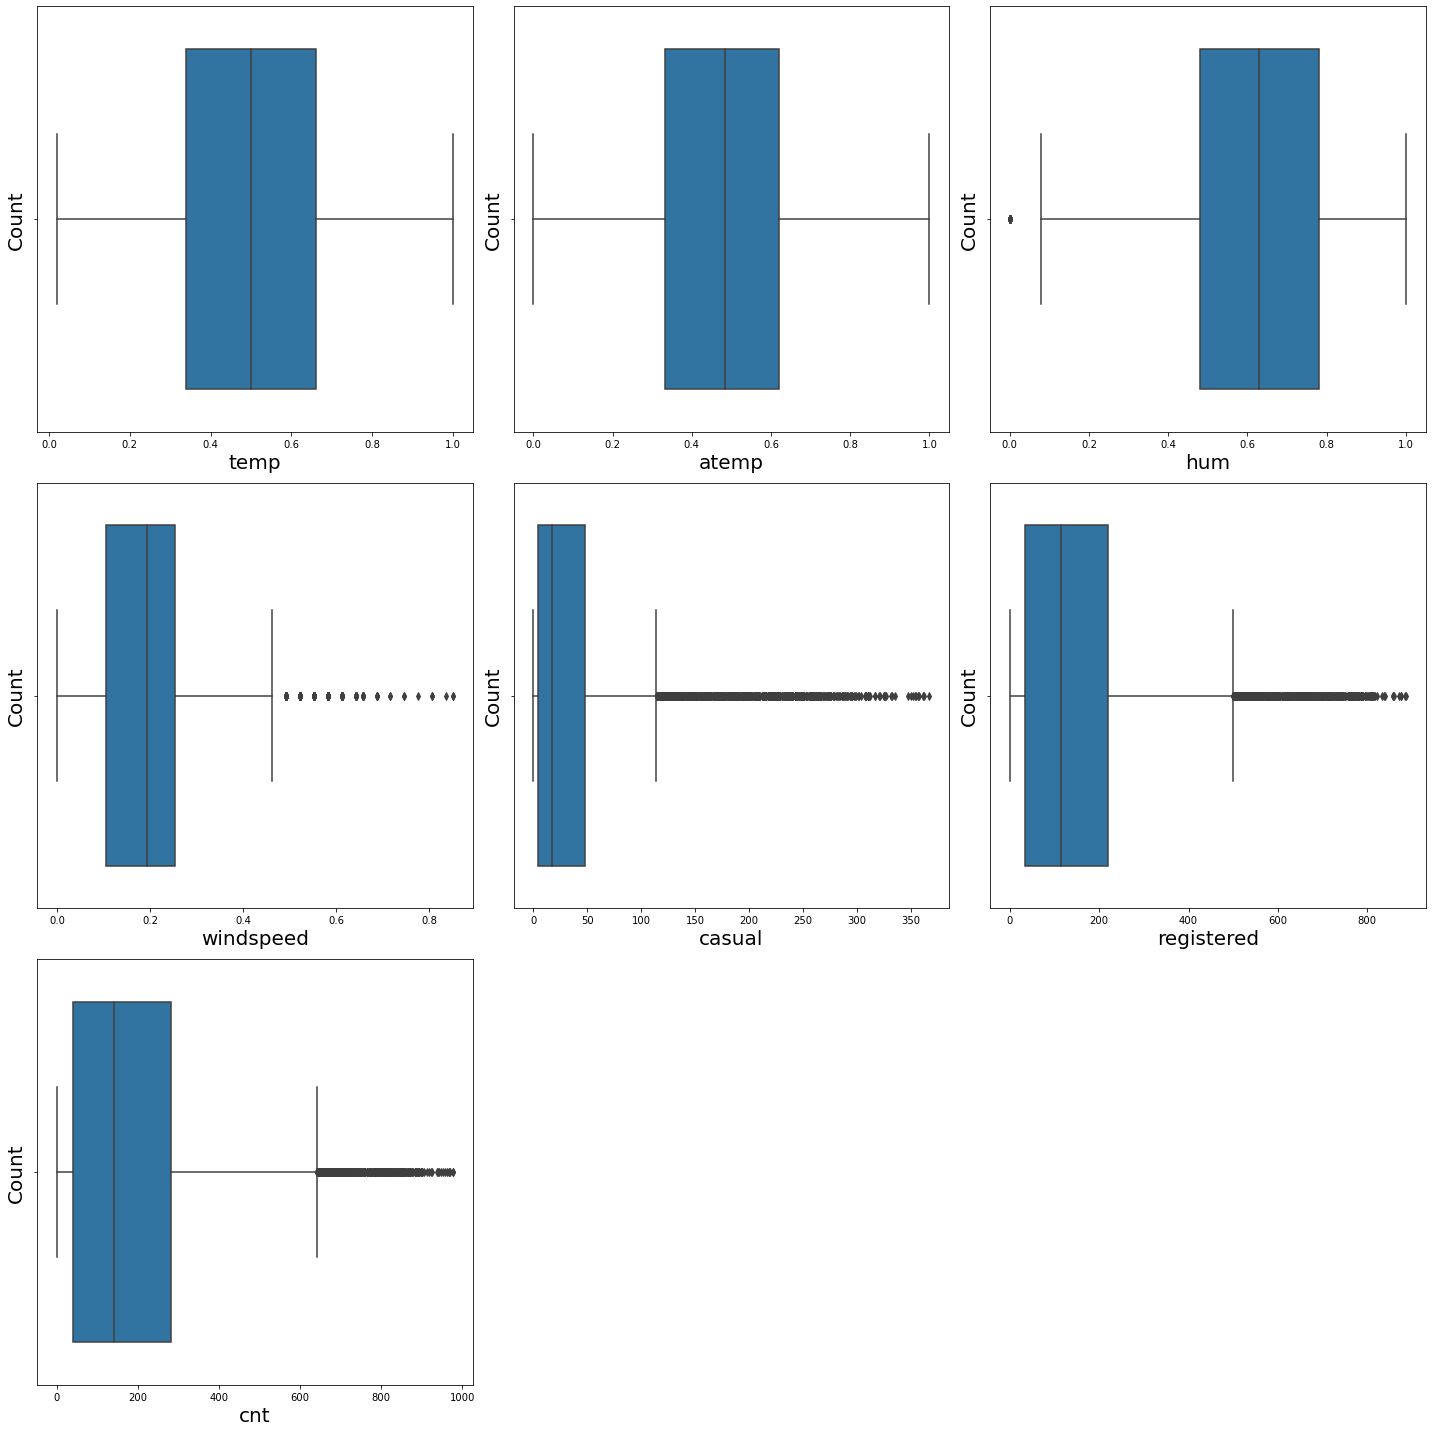

In [60]:
# Step 3 - Checking the outliers
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [61]:
# Outliers found in humidity, windspeed,registered,casual and cnt lets check their length and handle them.

### Handling outliers of humidity

<AxesSubplot:xlabel='hum', ylabel='Density'>

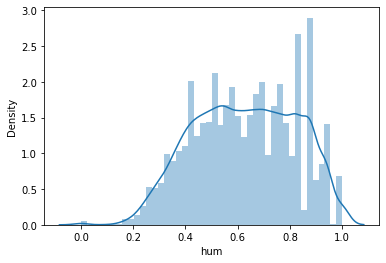

In [63]:
sns.distplot(data.hum)
# Negatively skewed so we will be using IQR to handle outliers.

In [212]:
from scipy import stats

In [213]:
IQR = stats.iqr(data.hum,interpolation='midpoint')
IQR

0.30000000000000004

In [214]:
Q1 = data.hum.quantile(0.25)
Q3 = data.hum.quantile(0.75)
max_lim = Q3 +1.5*IQR
min_lim = Q1 -1.5*IQR
print(max_lim)
min_lim

1.23


0.029999999999999916

In [215]:
len(data.loc[data['hum']<min_lim])/data.shape[0]

0.001265895621151965

In [216]:
data.loc[data['hum']<min_lim,'hum'] = data.hum.median()

In [217]:
data.loc[data['hum']<min_lim]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


### Handling outliers of windspeed 

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

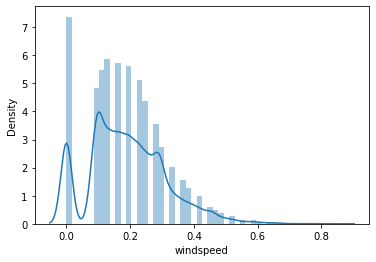

In [218]:
sns.distplot(data.windspeed)
# Positively skewed so using IQR to handle the outliers

In [219]:
IQR = stats.iqr(data.windspeed,interpolation='midpoint')
IQR

0.1492

In [220]:
Q1 = data.windspeed.quantile(0.25)
Q3 = data.windspeed.quantile(0.75)
max_lim = Q3 +1.5*IQR
min_lim = Q1 - 1.5*IQR
print(max_lim)
print(min_lim)

0.4775
-0.1193


In [221]:
len(data.loc[data['windspeed']>max_lim])/data.shape[0]

0.01967892283790782

In [222]:
len(data.loc[data['windspeed']<min_lim])/data.shape[0]

0.0

In [223]:
data.loc[data['windspeed'] > max_lim,'windspeed']=np.median(data.windspeed) # can see all outliers of max limit fill

In [224]:
data.loc[data['windspeed']>max_lim]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


### Handling outliers of Registered

<AxesSubplot:xlabel='registered', ylabel='Density'>

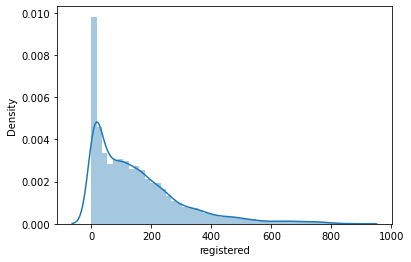

In [225]:
sns.distplot(data.registered)
# Positively skewed so using IQR to handle the outliers

In [42]:
IQR = stats.iqr(data.registered,interpolation='midpoint')
IQR

186.0

In [43]:
Q1 = data.registered.quantile(0.25)
Q3 = data.registered.quantile(0.75)
max_lim = Q3 +1.5*IQR
min_lim = Q1 - 1.5*IQR
print(max_lim)
print(min_lim)

499.0
-245.0


In [44]:
data.loc[data['registered']>max_lim]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2995,2996,2011-05-09,2,0,5,17,0,1,1,1,0.62,0.6212,0.38,0.2537,59,539,598
3019,3020,2011-05-10,2,0,5,17,0,2,1,1,0.64,0.6212,0.33,0.0000,79,532,611
3067,3068,2011-05-12,2,0,5,17,0,4,1,2,0.64,0.6212,0.57,0.1940,54,540,594
3187,3188,2011-05-17,2,0,5,17,0,2,1,1,0.62,0.6061,0.65,0.4179,83,521,604
3379,3380,2011-05-25,2,0,5,17,0,3,1,1,0.74,0.6667,0.51,0.2239,77,524,601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17063,17064,2012-12-18,4,1,12,18,0,2,1,1,0.38,0.3939,0.46,0.3284,13,512,525
17077,17078,2012-12-19,4,1,12,8,0,3,1,1,0.24,0.2576,0.87,0.1045,13,665,678
17086,17087,2012-12-19,4,1,12,17,0,3,1,1,0.40,0.4091,0.50,0.3881,26,536,562
17087,17088,2012-12-19,4,1,12,18,0,3,1,1,0.38,0.3939,0.50,0.3582,23,546,569


In [45]:
len(data.loc[data['registered']>max_lim])/data.shape[0]

0.03912768283560619

In [46]:
len(data.loc[data['registered']<min_lim])/data.shape[0]

0.0

In [48]:
data.loc[data['registered'] > max_lim,'registered']=np.median(data.casual)

In [49]:
data.loc[data['registered']>max_lim]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


### Handling outliers of casual

<AxesSubplot:xlabel='casual', ylabel='Density'>

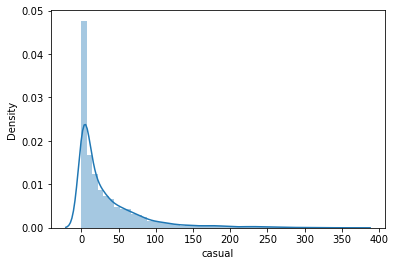

In [233]:
sns.distplot(data.casual)
# Positively skewed so using IQR to handle the outliers

In [35]:
IQR = stats.iqr(data.casual,interpolation='midpoint')
IQR

44.0

In [36]:
Q1 = data.casual.quantile(0.25)
Q3 = data.casual.quantile(0.75)
max_lim = Q3 +1.5*IQR
min_lim = Q1 - 1.5*IQR
print(max_lim)
print(min_lim)

114.0
-62.0


In [39]:
len(data.loc[data['casual']>max_lim])
# Not handling because of higher number of outliers

1192

In [40]:
data.loc[data['casual'] > max_lim,'casual']=np.median(data.casual)

### Handling outliers of count

<AxesSubplot:xlabel='cnt', ylabel='Density'>

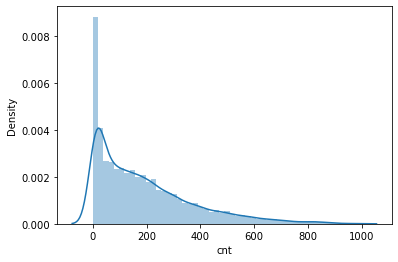

In [237]:
sns.distplot(data.cnt)
# Positively skewed so using IQR to handle the outliers

In [238]:
IQR = stats.iqr(data.cnt,interpolation='midpoint')
IQR

241.0

In [239]:
Q1 = data.cnt.quantile(0.25)
Q3 = data.cnt.quantile(0.75)
max_lim = Q3 +1.5*IQR
min_lim = Q1 - 1.5*IQR
print(max_lim)
print(min_lim)

642.5
-321.5


In [240]:
len(data.loc[data['cnt']>max_lim])/data.shape[0]


0.029058058576442832

In [241]:
data.loc[data['cnt']>max_lim]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5536,5537,2011-08-23,3,0,8,14,0,2,1,1,0.72,0.6515,0.30,0.0896,149,115,651
10358,10359,2012-03-12,1,1,3,17,0,1,1,2,0.62,0.6212,0.38,0.4179,87,115,644
10359,10360,2012-03-12,1,1,3,18,0,1,1,2,0.60,0.6212,0.43,0.1940,89,115,712
10382,10383,2012-03-13,1,1,3,17,0,2,1,1,0.70,0.6364,0.37,0.1045,62,115,676
10383,10384,2012-03-13,1,1,3,18,0,2,1,1,0.70,0.6364,0.34,0.2985,96,115,734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16885,16886,2012-12-11,4,1,12,8,0,2,1,2,0.34,0.3030,0.61,0.2985,16,115,724
16909,16910,2012-12-12,4,1,12,8,0,3,1,2,0.26,0.2576,0.65,0.1642,18,115,688
16933,16934,2012-12-13,4,1,12,8,0,4,1,1,0.24,0.2273,0.60,0.1940,24,115,679
17053,17054,2012-12-18,4,1,12,8,0,2,1,1,0.38,0.3939,0.94,0.0000,10,115,662


In [242]:
data.loc[data['cnt']>max_lim,'cnt'] = data.cnt.median()

In [243]:
data.loc[data['cnt']>max_lim]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


## Step 4 - Feature selection

In [115]:
data['dteday'] = pd.to_datetime(data['dteday'])

In [306]:
data['day'] = pd.DatetimeIndex(data['dteday']).day

In [117]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [244]:
# Step 1 - Draopping unwanted columns
data.drop(['instant'],axis=1,inplace=True)

In [15]:
# Step 1 - Draopping unwanted columns
data.drop(['instant','dteday'],axis=1,inplace=True)

In [120]:
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


<AxesSubplot:>

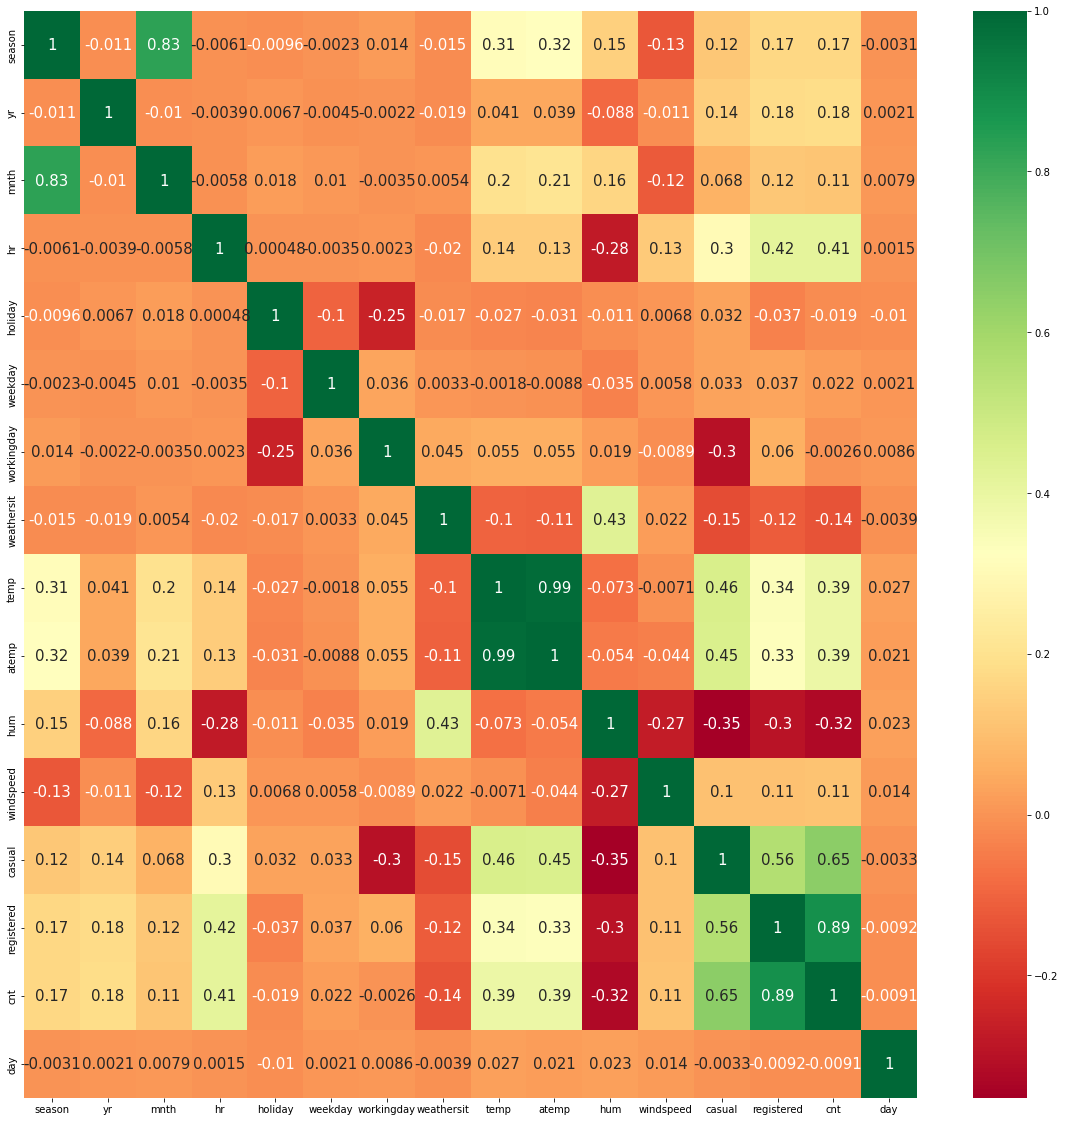

In [122]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn", annot_kws={"size":15})
# Temp is highly correlated with atemp so dropping temp 

In [16]:
data.drop('temp',axis=1,inplace=True)

In [124]:
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt,day
0,1,0,1,0,0,6,0,1,0.2879,0.81,0.0,3,13,16,1
1,1,0,1,1,0,6,0,1,0.2727,0.80,0.0,8,32,40,1
2,1,0,1,2,0,6,0,1,0.2727,0.80,0.0,5,27,32,1
3,1,0,1,3,0,6,0,1,0.2879,0.75,0.0,3,10,13,1
4,1,0,1,4,0,6,0,1,0.2879,0.75,0.0,0,1,1,1


In [50]:
from sklearn.preprocessing import MinMaxScaler 
sc=MinMaxScaler()
dl=['season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','hum','windspeed','casual','registered','cnt'] 


## Step 5 - Model creation

In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [51]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [3]:
# Step 1 Defining X and y
X = data[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'casual',
       'registered']]
y = data.cnt

In [4]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=50,test_size=0.15)

## Linear regression

In [5]:
# Model Selectio
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

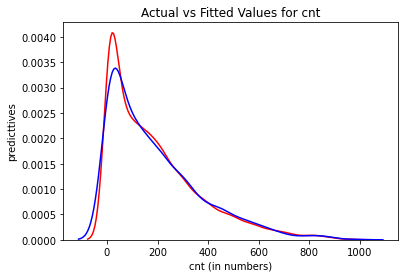

In [6]:
y_pred = LR.predict(X_test)

ax1=sns.distplot(data['cnt'],hist=False,color="r",label="Actual Values")
sns.distplot(y_pred,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for cnt")
plt.xlabel("cnt (in numbers)")
plt.ylabel("predicttives")

plt.show()
plt.close()

In [7]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [8]:
r2score_lr = r2_score(y_test,y_pred)

In [9]:
r2score_lr

1.0

In [10]:
X_test.shape

(2607, 13)

In [11]:
# Adjusted r2 score
Adjr2score_lr = 1-(1-1)*(2607-13)/(2607-13-1)
Adjr2score_lr

1.0

In [12]:
import math
mse_lr =mean_squared_error(y_test,y_pred)
smse_lr = math.sqrt(mean_squared_error(y_test,y_pred))
print(mse_lr)
smse_lr

2.4799587223866608e-26


1.5747884690924875e-13

In [13]:
mae_lr = mean_absolute_error(y_test,y_pred)
mae_lr

1.270325105814945e-13

## KNN regressor

In [14]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=6)

In [15]:
y_pre = knn.predict(X_test)

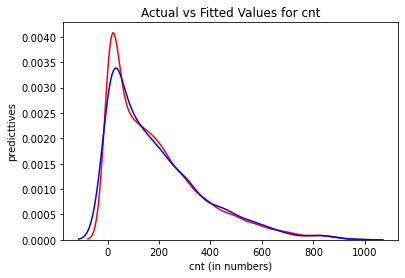

In [16]:
y_pre = knn.predict(X_test)

ax1=sns.distplot(data['cnt'],hist=False,color="r",label="Actual Values")
sns.distplot(y_pre,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for cnt")
plt.xlabel("cnt (in numbers)")
plt.ylabel("predicttives")

plt.show()
plt.close()

In [17]:
r2score_knn = r2_score(y_test,y_pre)
r2score_knn

0.9998775717526271

In [18]:
# Adjusted r2 score
Adjr2score_knn = 1-(1-0.99)*(2607-13)/(2607-13-1)
Adjr2score_knn

0.9899961434631701

In [19]:
mse_knn = mean_squared_error(y_test,y_pre)
smse_knn = math.sqrt(mean_squared_error(y_test,y_pre))
print(mse_knn)
smse_knn

4.083844776882751


2.020852487660282

In [20]:
mae_knn = mean_absolute_error(y_test,y_pre)
mae_knn

1.2965733282188974

In [163]:
## Error calculation for regression task
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

rmse_val = [] #create list to store rmse values for different k
for K in range(1,20):
    
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 2.9183361433871475
RMSE value for k=  2 is: 2.487637249896629
RMSE value for k=  3 is: 2.3397631830962653
RMSE value for k=  4 is: 2.1747914996025215
RMSE value for k=  5 is: 2.1437234992228036
RMSE value for k=  6 is: 2.020852487660282
RMSE value for k=  7 is: 2.0781450233842134
RMSE value for k=  8 is: 2.132054953265456
RMSE value for k=  9 is: 2.175200421143727
RMSE value for k=  10 is: 2.228858394559784
RMSE value for k=  11 is: 2.280798167166402
RMSE value for k=  12 is: 2.3675956593100707
RMSE value for k=  13 is: 2.4564488854123474
RMSE value for k=  14 is: 2.504901139731485
RMSE value for k=  15 is: 2.5121999556108987
RMSE value for k=  16 is: 2.5448802839745093
RMSE value for k=  17 is: 2.5326059202662554
RMSE value for k=  18 is: 2.608863510085572
RMSE value for k=  19 is: 2.685711976995817


## Decision tree

In [22]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [153]:
y_pr = dt.predict(X_test)

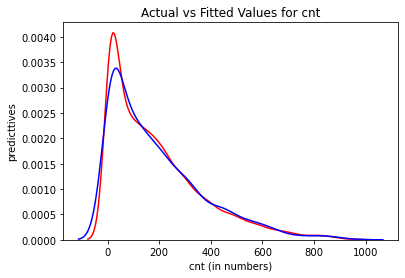

In [154]:
y_pr = dt.predict(X_test)

ax1=sns.distplot(data['cnt'],hist=False,color="r",label="Actual Values")
sns.distplot(y_pr,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for cnt")
plt.xlabel("cnt (in numbers)")
plt.ylabel("predicttives")

plt.show()
plt.close()

In [155]:
print(r2_score(y_test,y_pr))

0.9993483577120557


In [86]:
# Adjusted r2 score
Adjr2score = 1-(1-0.99)*(2607-13)/(2607-13-1)
Adjr2score

0.9899961434631701

In [87]:
print(mean_squared_error(y_test,y_pr))
print(math.sqrt(mean_squared_error(y_test,y_pr)))

24.075565784426544
4.906685824915484


In [88]:
print(mean_absolute_error(y_test,y_pr))

2.2681242807825086


In [140]:
from sklearn.model_selection import GridSearchCV


In [177]:


params = {
    "criterion":("squared_error", "absolute_error"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}
           

tree_regr = DecisionTreeRegressor(random_state=3)
tree_cv = GridSearchCV(tree_regr, params, scoring="f1", n_jobs=-1, verbose=2, cv=3)
tree_cv.fit(X_train,y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")



Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


KeyboardInterrupt: 

In [23]:
dt1=DecisionTreeRegressor(criterion='squared_error',
                           max_depth=60,min_samples_leaf=2,
                           min_samples_split=2,splitter='best',random_state=150)

In [24]:
dt1.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=60, min_samples_leaf=2, random_state=150)

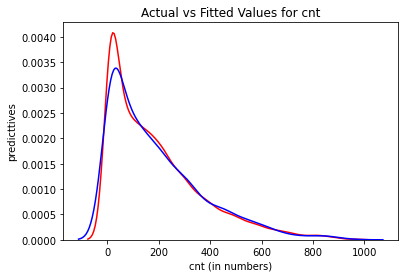

In [25]:
y_hat = dt1.predict(X_test)

ax1=sns.distplot(data['cnt'],hist=False,color="r",label="Actual Values")
sns.distplot(y_hat,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for cnt")
plt.xlabel("cnt (in numbers)")
plt.ylabel("predicttives")

plt.show()
plt.close()

In [26]:
r2score_dt =r2_score(y_test,y_hat)
r2score_dt

0.9993835851763524

In [27]:
# Adjusted r2 score
Adjr2score_dt = 1-(1-0.99)*(2607-13)/(2607-13-1)
Adjr2score_dt

0.9899961434631701

In [28]:
mse_dt = mean_squared_error(y_test,y_hat)
smse_dt = math.sqrt(mean_squared_error(y_test,y_hat))
print(mse_dt)
smse_dt

20.56177811874014


4.534509688901341

In [29]:
mae_dt = mean_absolute_error(y_test,y_hat)
mae_dt

2.1861654519882365

## Random forest

In [30]:
from sklearn.ensemble import RandomForestRegressor
rg = RandomForestRegressor(random_state=250)
rg.fit(X_train,y_train)

RandomForestRegressor(random_state=250)

In [31]:
y_ht = rg.predict(X_test)

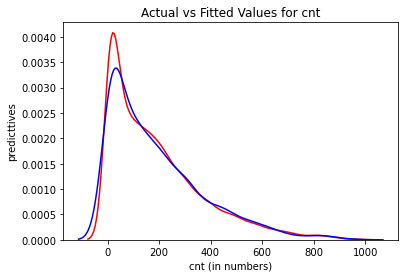

In [32]:

ax1=sns.distplot(data['cnt'],hist=False,color="r",label="Actual Values")
sns.distplot(y_ht,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for cnt")
plt.xlabel("cnt (in numbers)")
plt.ylabel("predicttives")

plt.show()
plt.close()

In [33]:
r2score_rf = r2_score(y_test,y_ht)
r2score_rf

0.9998441432453438

In [34]:
# Adjusted r2 score
Adjr2score_rf = 1-(1-0.99)*(2607-13)/(2607-13-1)
Adjr2score_rf

0.9899961434631701

In [35]:
mse_rf = mean_squared_error(y_test,y_ht)
smse_rf = math.sqrt(mean_squared_error(y_test,y_ht))
print(mse_rf)
smse_rf

5.198921058688145


2.280114264392937

In [36]:

mae_rf = mean_absolute_error(y_test,y_ht)
mae_rf

0.9064672036823939

## Bagging

In [37]:
from sklearn.ensemble import BaggingRegressor
KNN = KNeighborsRegressor()
bg = BaggingRegressor(base_estimator=KNN,n_estimators=70,random_state=250)
bg.fit(X_train,y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(), n_estimators=70,
                 random_state=250)

In [38]:
y_hatt = bg.predict(X_test)

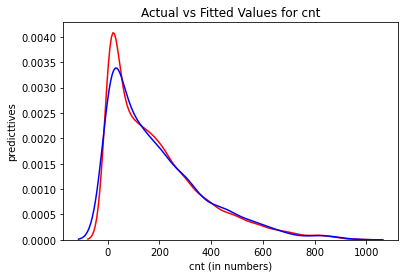

In [39]:

ax1=sns.distplot(data['cnt'],hist=False,color="r",label="Actual Values")
sns.distplot(y_hatt,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for cnt")
plt.xlabel("cnt (in numbers)")
plt.ylabel("predicttives")

plt.show()
plt.close()

In [40]:
r2score_bg = r2_score(y_test,y_hatt)
r2score_bg

0.9998898508727668

In [41]:
# Adjusted r2 score
Adjr2score_bg = 1-(1-0.99)*(2607-13)/(2607-13-1)
Adjr2score_bg

0.9899961434631701

In [42]:
mse_bg = mean_squared_error(y_test,y_hatt)
smse_bg = math.sqrt(mean_squared_error(y_test,y_hatt))
print(mse_bg)
smse_bg

3.674249591758425


1.916833219599041

In [43]:
mae_bg = mean_absolute_error(y_test,y_hatt)
mae_bg

1.1849701353498794

## Boosting

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [45]:
pred = gr.predict(X_test)

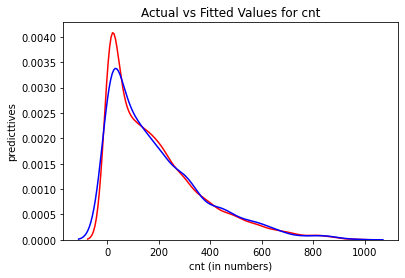

In [46]:

ax1=sns.distplot(data['cnt'],hist=False,color="r",label="Actual Values")
sns.distplot(pred,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for cnt")
plt.xlabel("cnt (in numbers)")
plt.ylabel("predicttives")

plt.show()
plt.close()

In [47]:
r2score_bs = r2_score(y_test,pred)
r2score_bs

0.9991676726078866

In [48]:
# Adjusted r2 score
Adjr2score_bs = 1-(1-0.99)*(2607-13)/(2607-13-1)
Adjr2score_bs

0.9899961434631701

In [49]:
mse_bs = mean_squared_error(y_test,pred)
smse_bs = math.sqrt(mean_squared_error(y_test,pred))
print(mse_bs)
smse_bs

27.763983769096775


5.2691539898827

In [50]:
mae_bs = mean_absolute_error(y_test,pred)
mae_bs

3.1593214274467765

## Huber regressor

In [51]:
from sklearn.linear_model import HuberRegressor
hr = HuberRegressor(epsilon=1.55,alpha=0.0002,max_iter=150)
hr.fit(X_train,y_train)

HuberRegressor(alpha=0.0002, epsilon=1.55, max_iter=150)

In [52]:
predic = hr.predict(X_test)

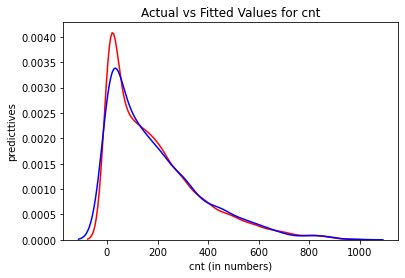

In [53]:

ax1=sns.distplot(data['cnt'],hist=False,color="r",label="Actual Values")
sns.distplot(predic,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for cnt")
plt.xlabel("cnt (in numbers)")
plt.ylabel("predicttives")

plt.show()
plt.close()

In [54]:
r2score_hb = r2_score(y_test,predic)
r2score_hb

0.9999999999966952

In [55]:
# Adjusted r2 score
Adjr2score_hb  = 1-(1-0.99)*(2607-13)/(2607-13-1)
Adjr2score_hb

0.9899961434631701

In [56]:
mse_hb = mean_squared_error(y_test,predic)
smse_hb = math.sqrt(mean_squared_error(y_test,predic))
print(mse_hb)
smse_hb

1.1023920733907894e-07


0.0003320229018291945

In [57]:
mae_hb = mean_absolute_error(y_test,predic)
mae_hb

0.00025951562649678206

## Passive agressive regressor

In [58]:
from sklearn.linear_model import PassiveAggressiveRegressor
par = PassiveAggressiveRegressor(C=1,max_iter=1500,epsilon=0.1)
par.fit(X_train,y_train)


PassiveAggressiveRegressor(C=1, max_iter=1500)

In [59]:
predd = par.predict(X_test)

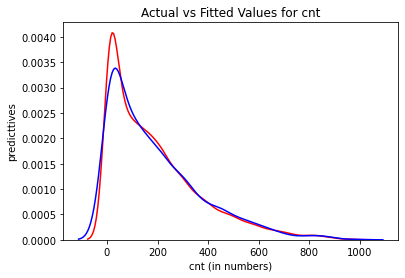

In [60]:

ax1=sns.distplot(data['cnt'],hist=False,color="r",label="Actual Values")
sns.distplot(predd,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for cnt")
plt.xlabel("cnt (in numbers)")
plt.ylabel("predicttives")

plt.show()
plt.close()

In [61]:
r2score_par = r2_score(y_test,predd)
r2score_par

0.9999999595472525

In [62]:
# Adjusted r2 score
Adjr2score_par = 1-(1-0.99)*(2607-13)/(2607-13-1)
Adjr2score_par

0.9899961434631701

In [63]:
mse_par = mean_squared_error(y_test,predd)
smse_par = math.sqrt(mean_squared_error(y_test,predd))
print(mse_par)
smse_par

0.0013493841902663135


0.03673396507683745

In [67]:
mae_par = mean_absolute_error(y_test,predd)
mae_par

0.02973821625352454

In [74]:
pd.set_option('display.float_format',str)
r2_score=[r2score_lr,r2score_knn,r2score_dt,r2score_rf,r2score_bg,r2score_bs,r2score_hb,r2score_par]
Adjusted_R2_Score=[Adjr2score_lr,Adjr2score_knn,Adjr2score_dt,Adjr2score_rf,Adjr2score_bg,Adjr2score_bs,Adjr2score_hb,Adjr2score_par]
MSE =[mse_lr,mse_knn,mse_dt,mse_rf,mse_bg,mse_bs,mse_hb,mse_par]
RMSE = [smse_lr,smse_knn,smse_dt,smse_rf,smse_bg,smse_bs,smse_hb,smse_par]
MAE = [mae_lr,mae_knn,mae_dt,mae_rf,mae_bg,mae_bs,mae_hb,float(mae_par)]
col={'R2 Score':r2_score,'Adjusted R2 Score':Adjusted_R2_Score,'Mean_squared_error':MSE,'Root_mean_squared_error':RMSE,'mean_absolute_error':MAE}
models=['Linear Regression','KNN','Decision tree','RAndom forest','Bagging','Boosting','Huber regressor','Passive aggressive regressor']
df=pd.DataFrame(data=col,index= models)
df

,R2 Score,Adjusted R2 Score,Mean_squared_error,Root_mean_squared_error,mean_absolute_error
Linear Regression,1.0,1.0,2.4799587223866608e-26,1.5747884690924875e-13,1.270325105814945e-13
KNN,0.9998775717526271,0.9899961434631701,4.083844776882751,2.020852487660282,1.2965733282188974
Decision tree,0.9993835851763524,0.9899961434631701,20.56177811874014,4.534509688901341,2.1861654519882365
RAndom forest,0.9998441432453438,0.9899961434631701,5.198921058688145,2.280114264392937,0.9064672036823939
Bagging,0.9998898508727668,0.9899961434631701,3.674249591758425,1.916833219599041,1.1849701353498794
Boosting,0.9991676726078866,0.9899961434631701,27.763983769096775,5.2691539898827,3.1593214274467765
Huber regressor,0.9999999999966952,0.9899961434631701,1.1023920733907894e-07,0.0003320229018291945,0.00025951562649678206
Passive aggressive regressor,0.9999999595472525,0.9899961434631701,0.0013493841902663135,0.03673396507683745,0.02973821625352454


## Conclusion : We used the above algorithms to predict the count of rental bikes. Every algorithm gave r2score and adjusted r2score almost same with minute differences.But the passive aggresive regressor outperforms from all the algorithms by giving least mean sqaured,root mean squared and mean absolute errors.

## Important insights
### -Working days are in more demand.
### -Registered people are the keyplayers in renting bikes